# Air Quality Prediction (AQI) Using Python
CRISP-DM Methodology

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df=pd.read_csv('../dataset/air_quality.csv'); df.head()

,date,city,station_id,aqi,pm25,pm10,no2,so2,co,o3,temp_c,relative_humidity
0,2021-07-12,Bengaluru,BEN_ST3,125.4 AQI,64.7 ug/m3,89.6 ug/m3,43.5 ug/m3,-99.0 ug/m3,1.053 mg/m3,40.1 ug/m3,25.4 C,25.6 %
1,2024-11-21,Delhi,DEL_ST2,146.9 AQI,80.4 ug/m3,111.6 ug/m3,38.6 ug/m3,14.3 ug/m3,1.029 mg/m3,30.5 ug/m3,25.1 C,39.6 %
2,2023-05-12,Pune,PUN_ST3,116.6 AQI,55.7 ug/m3,83.1 ug/m3,15.0 ug/m3,5.4 ug/m3,1.273 mg/m3,55.9 ug/m3,30.8 C,55.7 %
3,2021-09-08,Lucknow,LUC_ST2,NaN,74.0 ug/m3,149.7 ug/m3,45.7 ug/m3,10.9 ug/m3,0.327 mg/m3,27.0 ug/m3,14.9 C,51.8 %
4,2021-04-17,Chennai,CHE_ST1,103.3 AQI,66.6 ug/m3,77.6 ug/m3,11.4 ug/m3,14.2 ug/m3,0.949 mg/m3,46.8 ug/m3,23.1 C,82.4 %


In [10]:

df.dtypes

date                   int64
city                 float64
station_id             int64
aqi                  float64
pm25                 float64
pm10                 float64
no2                  float64
so2                  float64
co                   float64
o3                   float64
temp_c               float64
relative_humidity    float64
dtype: object

In [9]:
df.shape

(66560, 12)

In [3]:
for c in df.columns:
    df[c]=df[c].astype(str).str.replace('[^0-9.]','',regex=True)
numeric_df = df.apply(pd.to_numeric, errors='coerce')
df = numeric_df.fillna(numeric_df.median())

In [14]:
df.describe()

,date,city,station_id,aqi,pm25,pm10,no2,so2,co,o3,temp_c,relative_humidity
count,6.656000e+04,0.0,66560.000000,66560.000000,66560.000000,66560.00000,66560.000000,66560.000000,66560.000000,66560.000000,66560.000000,66560.000000
mean,2.022567e+07,NaN,1.999715,127.134979,67.850652,95.92915,42.935505,12.824865,1.000507,35.057831,24.959543,54.884925
std,1.707828e+04,NaN,0.816371,46.132891,26.192777,39.76091,19.231271,16.027121,0.300180,11.989838,5.017599,14.950583
min,2.020010e+07,NaN,1.000000,0.100000,0.030000,0.03000,0.030000,0.030000,0.000300,0.030000,5.400000,10.000000
25%,2.021070e+07,NaN,1.000000,96.200000,50.130000,69.20500,30.430000,6.730000,0.798300,26.930000,21.500000,44.700000
50%,2.023010e+07,NaN,2.000000,126.200000,65.330000,92.63000,41.030000,10.230000,1.000300,35.130000,25.000000,54.900000
75%,2.024070e+07,NaN,3.000000,157.800000,83.330000,118.43000,52.130000,13.730000,1.203300,43.130000,28.300000,65.100000
max,2.025123e+07,NaN,3.000000,288.100000,170.430000,257.93000,100.730000,99.030000,2.142300,86.630000,47.600000,100.000000


In [12]:
df.isnull().sum()

date                     0
city                 66560
station_id               0
aqi                      0
pm25                     0
pm10                     0
no2                      0
so2                      0
co                       0
o3                       0
temp_c                   0
relative_humidity        0
dtype: int64

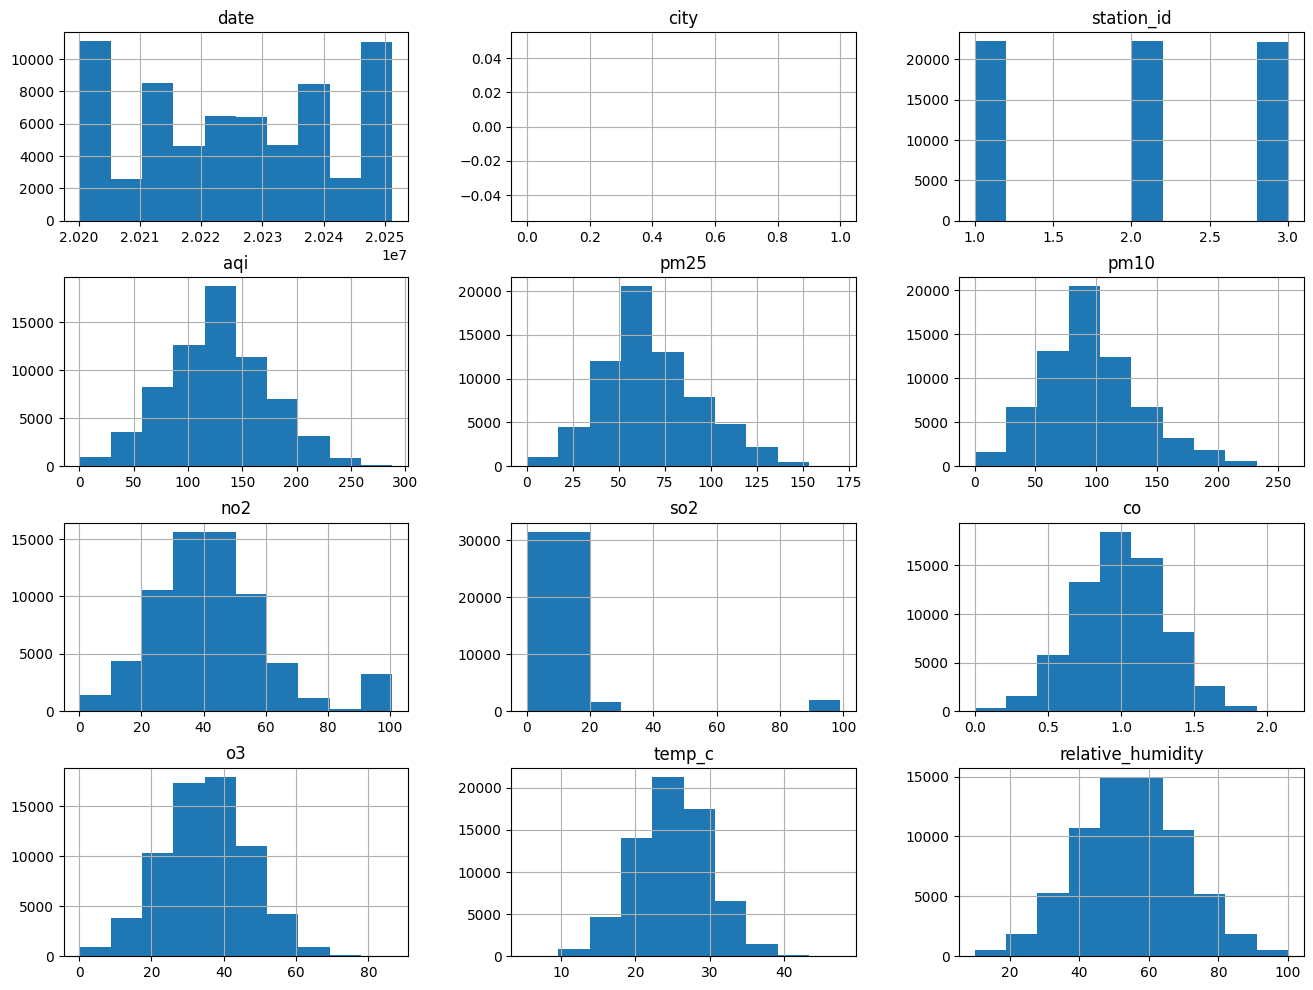

In [5]:
df.hist(figsize=(16,12)); plt.show()

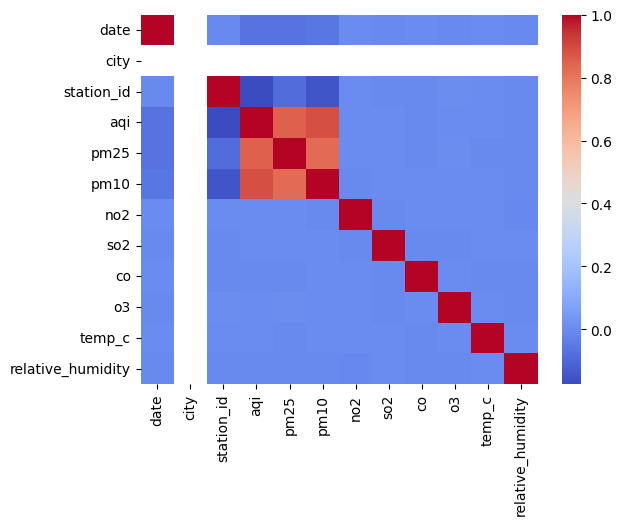

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm'); plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os, math
# Use only pollutant features for web app
features = ['pm25', 'pm10', 'no2', 'so2', 'co']
X = df[features]; y = df['aqi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(r2_score(y_test, pred), mean_absolute_error(y_test, pred), rmse)
os.makedirs('../model', exist_ok=True)
import joblib; joblib.dump(model, '../model/aqi_model.pkl')


0.8840617217831016 9.175224722055292 15.753353791506823


['../model/aqi_model.pkl']